In [1]:
import numpy as np
import matplotlib.pyplot as plt

from experimentalis import *
from experimentalis.models import CustomFitModel, DampedHarmonicModel

For this example, we'll make a `CustomFitModel` to fit to a damped harmonic oscillator. The analytical one-dimensional solution for a damped harmonic oscillator is
$$x(t) = A\exp(-\gamma t) \cos(2\pi f t + \phi)$$
where $A$ is the amplitude, $\gamma$ is the damping coefficient, $f$ is the frequency of oscillations, and $\phi$ is the phase.

In [2]:
def damped_harmonic_oscillation(t, A, gamma, f, phi):
    return A * np.exp(-gamma * t) * np.cos(2 * np.pi * f * t + phi)

Next, we need to develop a dataset to model with, and the simplest way to do this is to set some premade parameters and then generate the data with some noise, and the goal of our model will be to compare our true parameters against what our model produces:

In [3]:
# True physical parameters
A_true     = 1.0
gamma_true = 0.15
f_true     = 1.2
phi_true   = 0.3

# Time axis
t = np.linspace(0, 10, 2000)

# Measurement noise
noise_std = 0.05

x_clean = damped_harmonic_oscillation(t, A_true, gamma_true, f_true, phi_true)
x_noisy = x_clean + np.random.normal(0, noise_std, size=len(t))

dataset = Dataset(
    x=t,
    y=x_noisy,
    dy=np.full_like(t, noise_std)
)

/home/moofy/Programming/experimentalis/experimentalis/dataset.py:33: UserWarning: No dx set, setting all values to zero.
  warnings.warn('No dx set, setting all values to zero.')


Now, we can visualize this dataset. Before doing this, we need to build a `GraphingOptions` object:

In [4]:
g_opts = GraphingOptions(
    x_label = 'Time',
    y_label = 'Displacement',
    x_units = 's',
    y_units = 'm'
)

And now, we can easily plot this data:

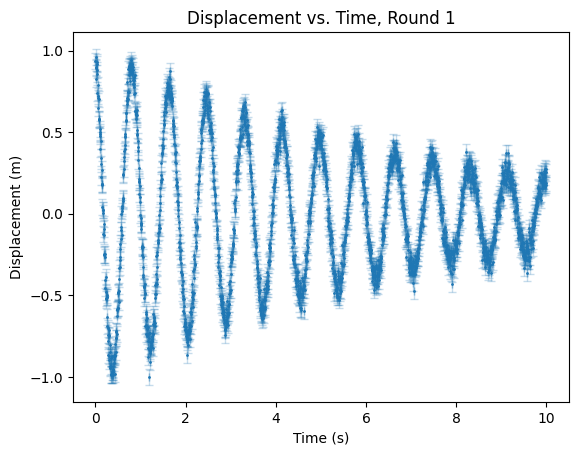

In [5]:
g_opts.plot_datasets([dataset])

Now, we can wrap `damped_harmonic_oscillation` in a `CustomFitModel` alongside some initial guesses that we can use to solve with:

In [6]:
model = CustomFitModel(
    fit_function=damped_harmonic_oscillation,
    initial_params={
        "Amplitude": 0.8,
        "Damping Coefficient": 0.1,
        "Frequency": 1.0,
        "Phase": 0.0,
    }
)

Lastly, we can perform the fit, and see what results we get.

In [7]:
result = autofit(dataset, model, graphing_options=g_opts)
print_results(model, result, units=['m', 'Ns/m', 'Hz', 'unitless'])

,Measurement,Value,Uncertainty,Relative Uncertainty ($\%$):
0,Amplitude (m),1.002748,0.004409,0.439700
1,Damping Coefficient (Ns/m),0.149311,0.001185,0.793944
2,Frequency (Hz),1.199599,0.000187,0.015588
3,Phase (unitless),0.307546,0.004294,1.396146


Goodness of Fit: $\chi$² = 1.024

And, within or very closely near the limits of the uncertainty for each, we successfully estimated the model's parameters!

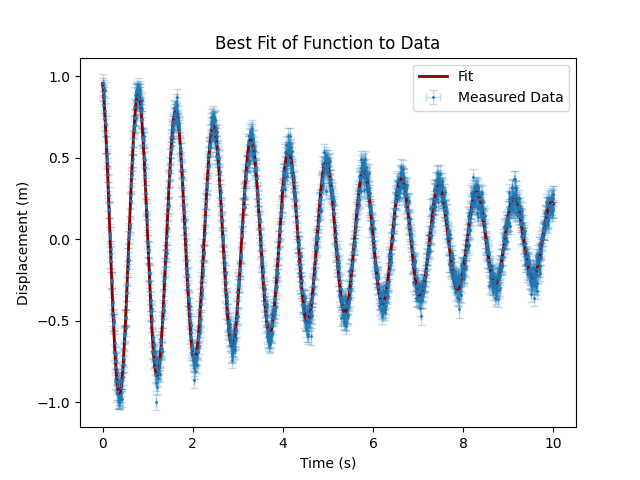

In [8]:
display(result.autofit_graph)

Now, what we actually did is already neatly included in the library with the `DampedHarmonicModel`. Let's try using this now:

In [10]:
model2 = DampedHarmonicModel(
    amplitude = 0.8,
    time_constant = 0.1,
    frequency = 1.0,
    phase = 0
)

In [11]:
result2 = autofit(dataset, model2, graphing_options=g_opts)
print_results(model2, result2, units=['m', 'Ns/m', 'Hz', 'unitless'])

,Measurement,Value,Uncertainty,Relative Uncertainty ($\%$):
0,Amplitude (m),1.002748,0.004409,0.439701
1,Damping/Time Constant (Ns/m),6.697450,0.053174,0.793945
2,Frequency (Hz),1.199599,0.000187,0.015588
3,Phase (unitless),0.307546,0.004294,1.396144


Goodness of Fit: $\chi$² = 1.024

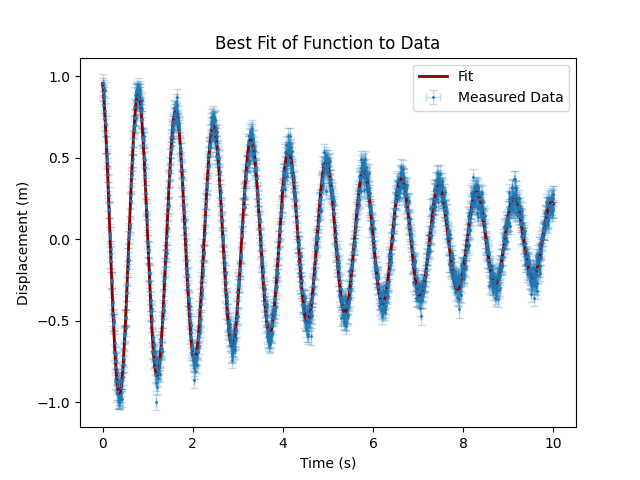

In [12]:
display(result2.autofit_graph)

It's the same!